In [2]:
import numpy as np 
import pandas as pd

In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv') 

In [6]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [7]:
movies.shape

(4803, 20)

In [8]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
movies = movies.merge(credits,on='title')

In [10]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [11]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
import ast

In [13]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [14]:
movies.dropna(inplace=True)

In [15]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [16]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [18]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L

In [19]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [21]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [22]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [23]:
#movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
2084,10187,Swing Vote,"In a remarkable turn of events, the result of ...","[Drama, Comedy]","[usa president, presidential election, fox news]","[Kevin Costner, Madeline Carroll, Paula Patton]",[Joshua Michael Stern]
1380,2118,L.A. Confidential,Three detectives in the corrupt and brutal L.A...,"[Crime, Drama, Mystery, Thriller]","[corruption, detective, shotgun, morgue, f wor...","[Kevin Spacey, Guy Pearce, Danny DeVito]",[Curtis Hanson]
3574,227348,Paranormal Activity: The Marked Ones,Seventeen-year-old Jesse has been hearing terr...,"[Horror, Thriller]","[supernatural, demon, found footage]","[Andrew Jacobs, Richard Cabral, Carlos Pratts]",[Christopher B. Landon]
4113,12901,No End in Sight,"Chronological look at the fiasco in Iraq, espe...",[Documentary],"[white house, occupying power, independent fil...","[Campbell Scott, Gerald Burke, Ali Fadhil]",[Charles Ferguson]
3770,1809,The Rules of Attraction,The incredibly spoiled and overprivileged stud...,"[Comedy, Drama, Romance]","[love triangle, independent film, multiple sto...","[James Van Der Beek, Shannyn Sossamon, Ian Som...",[Roger Avary]


In [24]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [25]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [26]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [27]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [28]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [29]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
#new.head()

In [30]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')


In [32]:
vector = cv.fit_transform(new['tags']).toarray()

In [33]:
vector.shape

(4806, 5000)

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
similarity = cosine_similarity(vector)

In [36]:
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [37]:
new[new['title'] == 'The Lego Movie'].index[0]

744

In [38]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)



In [39]:
recommend('Gandhi')

Gandhi, My Father
The Wind That Shakes the Barley
A Passage to India
Guiana 1838
Ramanujan


In [40]:
import pickle

In [41]:
pickle.dump(new,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

Average Precision: 0.5
Average Recall: 0.5833333333333333


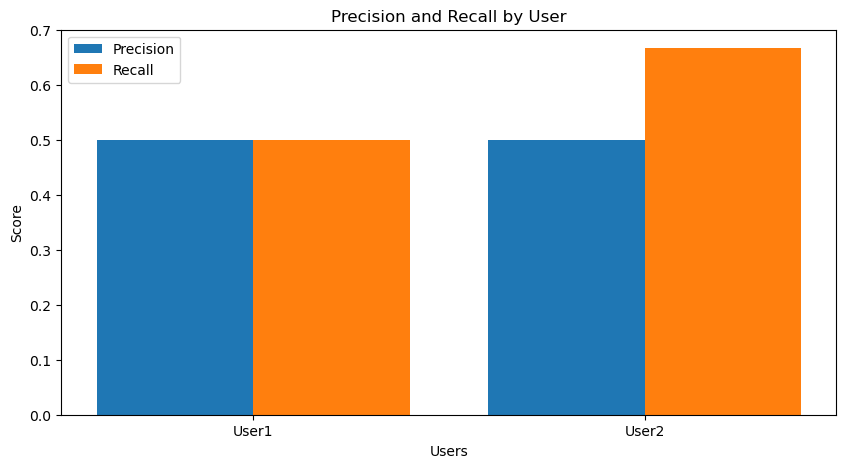

In [42]:
import matplotlib.pyplot as plt

def calculate_precision(actual_movies, recommended_movies):
   
    intersection = len(set(actual_movies) & set(recommended_movies))
    return intersection / len(recommended_movies) if len(recommended_movies) > 0 else 0

def calculate_recall(actual_movies, recommended_movies):
   
    intersection = len(set(actual_movies) & set(recommended_movies))
    return intersection / len(actual_movies) if len(actual_movies) > 0 else 0

def calculate_accuracy(test_dataset, recommendation_algorithm):
    
    total_precision = 0
    total_recall = 0
    num_users = len(test_dataset)

    precisions = []
    recalls = []

    for user, actual_movies in test_dataset.items():
        recommended_movies = recommendation_algorithm(user)
        if recommended_movies is None:
            continue
        precision = calculate_precision(actual_movies, recommended_movies)
        recall = calculate_recall(actual_movies, recommended_movies)
        total_precision += precision
        total_recall += recall
        precisions.append(precision)
        recalls.append(recall)

    average_precision = total_precision / num_users if num_users > 0 else 0
    average_recall = total_recall / num_users if num_users > 0 else 0

    return average_precision, average_recall, precisions, recalls


test_dataset = {
    'User1': ['The Avengers', 'The Dark Knight', 'Spectre', 'spider man'],
    'User2': ['The Avengers', 'Spectre', 'Superman return'],
   
}

def content_based_recommendation(user):
    
    return ['spider man', 'Avatar', 'Superman return', 'The Avengers'] if user in test_dataset else None

average_precision, average_recall, precisions, recalls = calculate_accuracy(test_dataset, content_based_recommendation)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)

# Plotting
users = list(test_dataset.keys())
x = range(len(users))

plt.figure(figsize=(10, 5))
plt.bar(x, precisions, width=0.4, label='Precision')
plt.bar([i + 0.4 for i in x], recalls, width=0.4, label='Recall')
plt.xlabel('Users')
plt.ylabel('Score')
plt.title('Precision and Recall by User')
plt.xticks([i + 0.2 for i in x], users)
plt.legend()
plt.show()


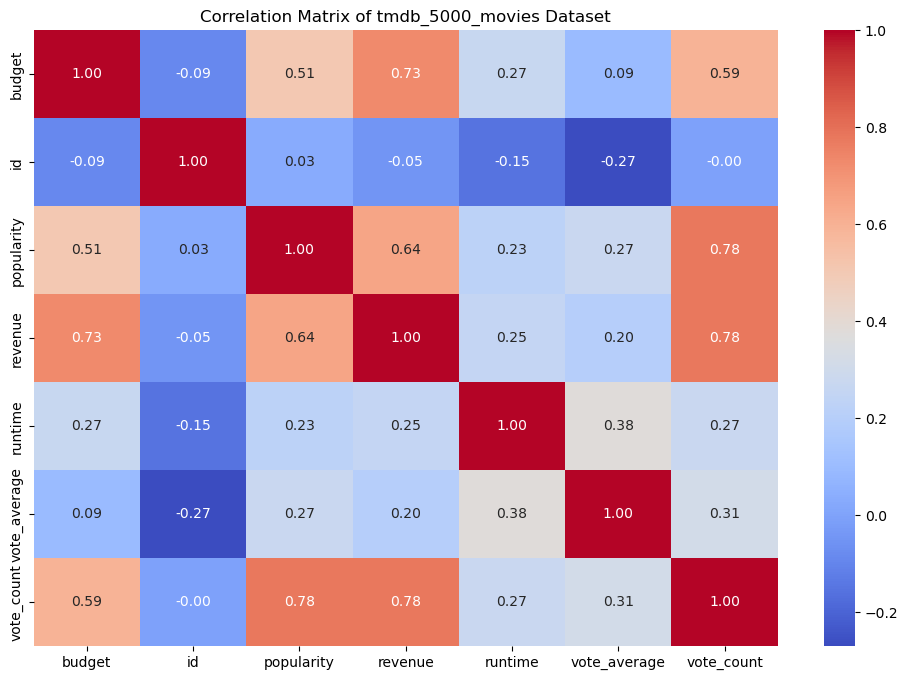

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('tmdb_5000_movies.csv')# Load the dataset

numeric_cols = df.select_dtypes(include=['number'])# Select only numeric columns

corr_matrix = numeric_cols.corr()# Compute the correlation matrix

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of tmdb_5000_movies Dataset')
plt.show()


In [44]:
import pandas as pd


df = pd.read_csv('tmdb_5000_credits.csv')


statistical_data = df.describe()

print(statistical_data)


            movie_id
count    4803.000000
mean    57165.484281
std     88694.614033
min         5.000000
25%      9014.500000
50%     14629.000000
75%     58610.500000
max    459488.000000


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

actual_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])
predicted_labels = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

# Calculate F1 score
f1 = f1_score(actual_labels, predicted_labels)

print("F1 Score:", f1)


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Sample ground truth ratings (actual ratings given by users)
actual_ratings = np.array([4, 5, 3, 2, 4, 5, 3, 4, 4, 5])
# Sample predicted ratings (ratings predicted by content-based filtering algorithm)
predicted_ratings = np.array([4.2, 4.8, 3.1, 3.5, 4.3, 4.9, 3.2, 4.1, 4.3, 4.9])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_ratings, predicted_ratings)

print("Mean Absolute Error (MAE):", mae)


In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample ground truth ratings (actual ratings given by users)
actual_ratings = np.array([4, 5, 3, 5, 4, 5, 3, 4, 3, 5])
# Sample predicted ratings (ratings predicted by content-based filtering algorithm)
predicted_ratings = np.array([4.2, 4.8, 4.1, 2.5, 4.3, 4.9, 4.2, 4.1, 2.3, 4.9])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.9792854537876073


In [ ]:
def calculate_accuracy_recommendation(actual_movies, recommended_movies):
    correct = len(set(actual_movies) & set(recommended_movies))
    total = len(recommended_movies)
    return correct / total if total > 0 else 0

# Evaluate accuracy across users
def evaluate_accuracy_for_all(test_dataset, recommendation_algorithm):
    total_accuracy = 0
    count = 0
    user_accuracies = {}
    
    for user, actual_movies in test_dataset.items():
        recommended_movies = recommendation_algorithm(user)
        if recommended_movies is None:
            continue
        accuracy = calculate_accuracy_recommendation(actual_movies, recommended_movies)
        total_accuracy += accuracy
        count += 1
        user_accuracies[user] = accuracy
    
    average_accuracy = total_accuracy / count if count > 0 else 0
    return average_accuracy, user_accuracies

# Example test dataset
test_dataset = {
    'User1': ['The Avengers', 'The Dark Knight', 'Spectre', 'spider man'],
    'User2': ['The Avengers', 'Spectre', 'Superman return'],
}

def content_based_recommendation(user):
    return ['spider man', 'Avatar', 'Superman return', 'The Avengers'] if user in test_dataset else None

average_accuracy, user_accuracies = evaluate_accuracy_for_all(test_dataset, content_based_recommendation)

print("Average Accuracy:", average_accuracy)
print("Per User Accuracy:", user_accuracies)


In [ ]:
from sklearn.metrics import accuracy_score

actual_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])
predicted_labels = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

accuracy = accuracy_score(actual_labels, predicted_labels)

print("Accuracy:", accuracy)
